## Deteksi Marka Jalan

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [2]:
img = cv2.imread('jalan.jpg')

In [3]:
cv2.imshow('gambar asli', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
scale_percent = 12
width = int (img.shape[1]*scale_percent/100)
height = int (img.shape[0]*scale_percent/100)
dimen = (width,height)

In [5]:
resize = cv2.resize(img, dimen, interpolation = cv2.INTER_AREA)

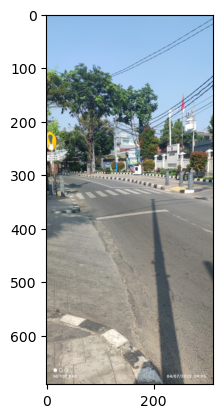

In [23]:
resize = cv2.cvtColor(resize, cv2.COLOR_BGR2RGB)
plt.imshow(resize)

In [7]:
gray = cv2.cvtColor(resize, cv2.COLOR_BGR2GRAY)
edge = cv2.Canny(resize, 100, 150)

Text(0.5, 1.0, 'Pasca Edge')

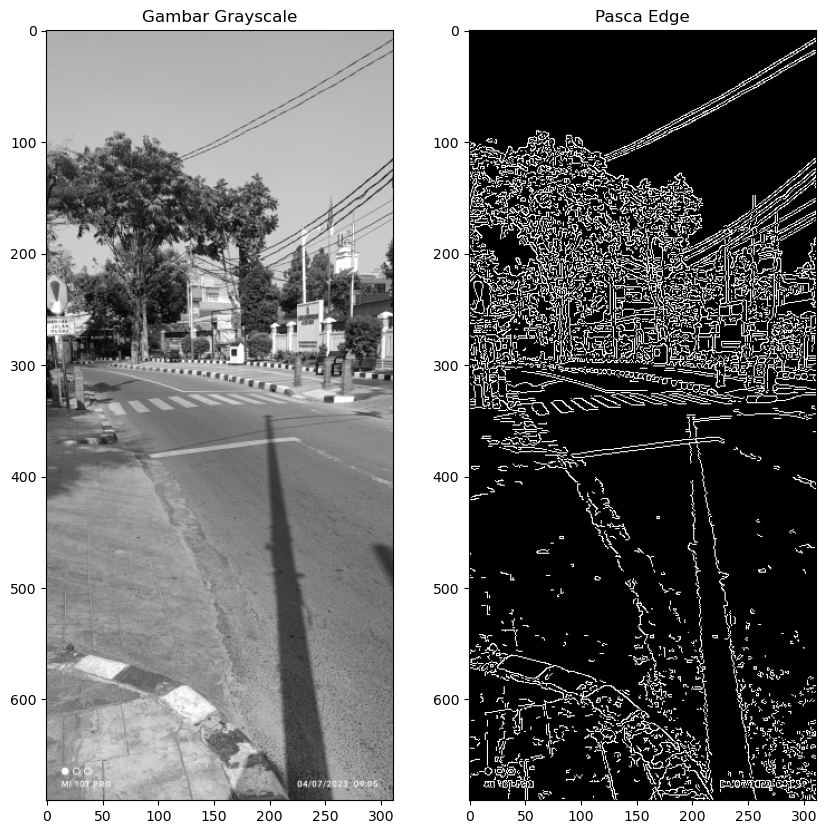

In [8]:
fig, axs = plt.subplots(1,2, figsize = (10,10))
ax = axs.ravel()
ax[0].imshow(gray, cmap = 'gray')
ax[0].set_title('Gambar Grayscale')
ax[1].imshow(edge, cmap = 'gray')
ax[1].set_title('Pasca Edge')

In [9]:
hsv = cv2.cvtColor(resize, cv2.COLOR_BGR2HSV)
bawah_kuning = np.array([18, 75, 130])
atas_kuning = np.array([48, 255, 255])
batas = cv2.inRange(hsv, bawah_kuning, atas_kuning)

In [11]:
lines = cv2.HoughLinesP(batas, 1, np.pi/180, 22, maxLineGap=40)
img_line = resize.copy()
for line in lines:
    x1, y1, x2, y2, = line[0]
    cv2.line(img_line, (x1,y1), (x2,y2), (0,0,255),1)

Text(0.5, 1.0, 'Pasca Deteksi')

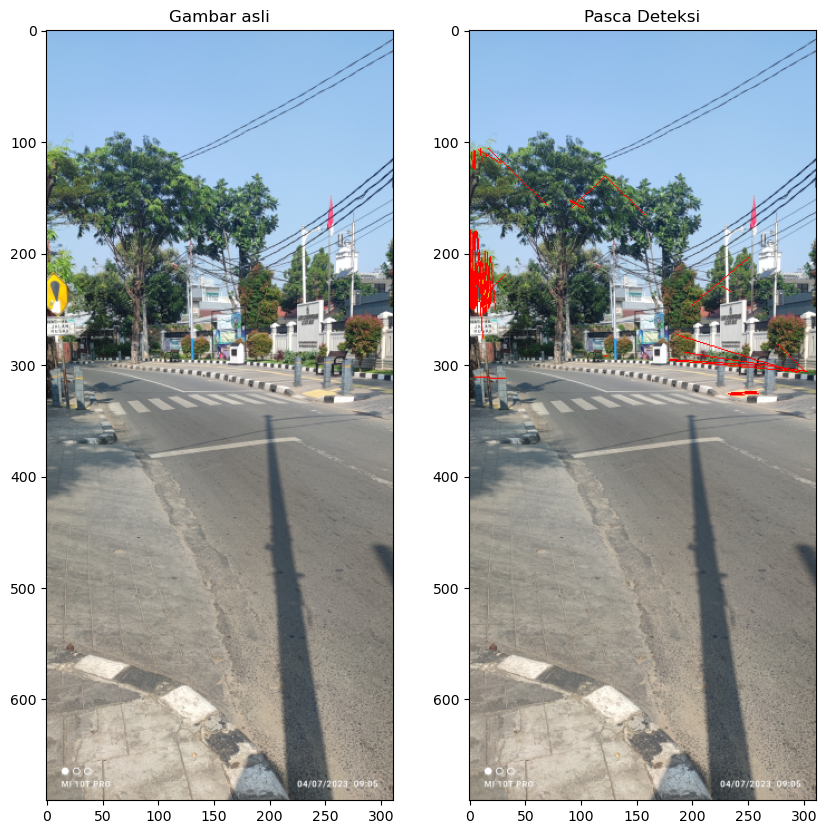

In [25]:
img_2 = cv2.cvtColor(img_line, cv2.COLOR_BGR2RGB)
fig, axs = plt.subplots(1,2, figsize = (10,10))
ax = axs.ravel()
ax[0].imshow(resize)
ax[0].set_title('Gambar asli')
ax[1].imshow(img_2)
ax[1].set_title('Pasca Deteksi')